In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize']=20,10
sns.set_style("whitegrid")

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [111]:
df=pd.read_csv('No-show-Issue-Comma-300k.csv')
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Age                      300000 non-null  int64 
 1   Gender                   300000 non-null  object
 2   AppointmentRegistration  300000 non-null  object
 3   ApointmentData           300000 non-null  object
 4   DayOfTheWeek             300000 non-null  object
 5   Status                   300000 non-null  object
 6   Diabetes                 300000 non-null  int64 
 7   Alcoolism                300000 non-null  int64 
 8   HiperTension             300000 non-null  int64 
 9   Handcap                  300000 non-null  int64 
 10  Smokes                   300000 non-null  int64 
 11  Scholarship              300000 non-null  int64 
 12  Tuberculosis             300000 non-null  int64 
 13  Sms_Reminder             300000 non-null  int64 
 14  AwaitingTime        

In [113]:
df.isna().sum()

Age                        0
Gender                     0
AppointmentRegistration    0
ApointmentData             0
DayOfTheWeek               0
Status                     0
Diabetes                   0
Alcoolism                  0
HiperTension               0
Handcap                    0
Smokes                     0
Scholarship                0
Tuberculosis               0
Sms_Reminder               0
AwaitingTime               0
dtype: int64

## Cleaning The Dataset

### Rename Columns

In [114]:
df.rename(columns={'ApointmentData':'AppointmentData',
                  'Alcoolism':'Alcoholism',
                  'HiperTension':'HyperTension',
                  'Handcap':'Handicap'}, inplace=True)
df.columns

Index(['Age', 'Gender', 'AppointmentRegistration', 'AppointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alcoholism', 'HyperTension',
       'Handicap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'],
      dtype='object')

### Manipulating Time Data

In [115]:
df.head()

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alcoholism,HyperTension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [116]:
df.AppointmentRegistration = df.AppointmentRegistration.apply(np.datetime64)
df.AppointmentData = df.AppointmentData.apply(np.datetime64)
df.AwaitingTime = df.AwaitingTime.apply(abs)

print(df.AppointmentRegistration.head())
print(df.AppointmentData.head())
print(df.AwaitingTime.head())

0   2014-12-16 14:46:25
1   2015-08-18 07:01:26
2   2014-02-17 12:53:46
3   2014-07-23 17:02:11
4   2015-10-21 15:20:09
Name: AppointmentRegistration, dtype: datetime64[ns]
0   2015-01-14
1   2015-08-19
2   2014-02-18
3   2014-08-07
4   2015-10-27
Name: AppointmentData, dtype: datetime64[ns]
0    29
1     1
2     1
3    15
4     6
Name: AwaitingTime, dtype: int64


In [117]:
df.head()

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alcoholism,HyperTension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16 14:46:25,2015-01-14,Wednesday,Show-Up,0,0,0,0,0,0,0,0,29
1,24,F,2015-08-18 07:01:26,2015-08-19,Wednesday,Show-Up,0,0,0,0,0,0,0,0,1
2,4,F,2014-02-17 12:53:46,2014-02-18,Tuesday,Show-Up,0,0,0,0,0,0,0,0,1
3,5,M,2014-07-23 17:02:11,2014-08-07,Thursday,Show-Up,0,0,0,0,0,0,0,1,15
4,38,M,2015-10-21 15:20:09,2015-10-27,Tuesday,Show-Up,0,0,0,0,0,0,0,1,6


In [118]:
df['Hour']=df['AppointmentRegistration'].dt.hour
df.head()

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alcoholism,HyperTension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,Hour
0,19,M,2014-12-16 14:46:25,2015-01-14,Wednesday,Show-Up,0,0,0,0,0,0,0,0,29,14
1,24,F,2015-08-18 07:01:26,2015-08-19,Wednesday,Show-Up,0,0,0,0,0,0,0,0,1,7
2,4,F,2014-02-17 12:53:46,2014-02-18,Tuesday,Show-Up,0,0,0,0,0,0,0,0,1,12
3,5,M,2014-07-23 17:02:11,2014-08-07,Thursday,Show-Up,0,0,0,0,0,0,0,1,15,17
4,38,M,2015-10-21 15:20:09,2015-10-27,Tuesday,Show-Up,0,0,0,0,0,0,0,1,6,15


# EDA

### Outliers in Awaiting Time

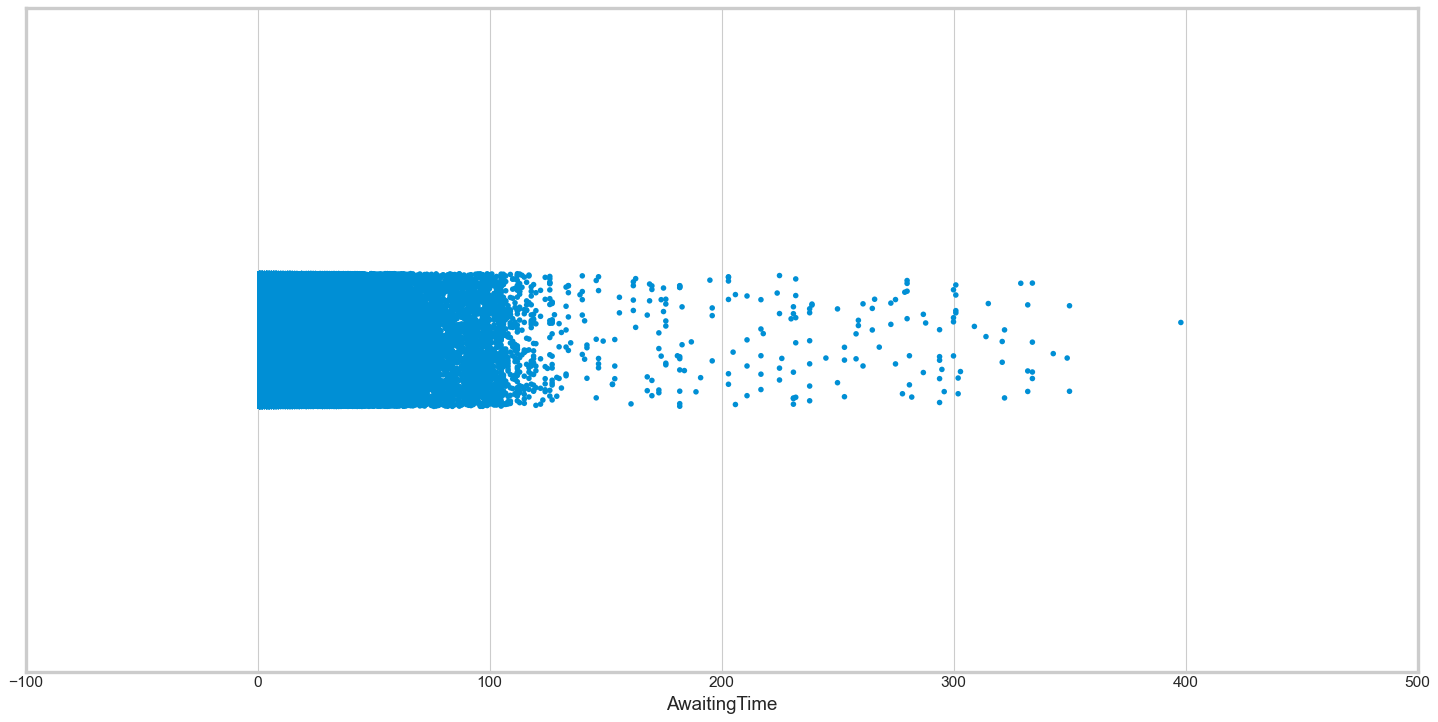

In [119]:
sns.stripplot(df['AwaitingTime']);

In [120]:
df['Status'].value_counts()[1]

90731

### Probability of Showing Up

In [121]:
def probStatus(dataset, group_by):
    x = pd.crosstab(index=dataset[group_by], columns=dataset.Status).reset_index()
    x['probShowUp'] = x['Show-Up'] / (x['Show-Up']+x['No-Show'])
    return x[[group_by, 'probShowUp']]

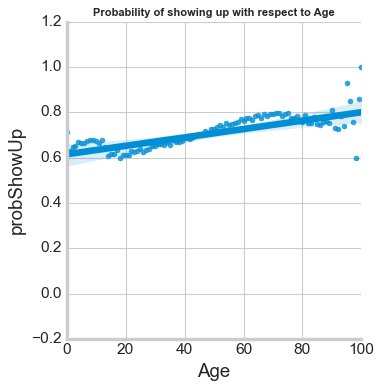

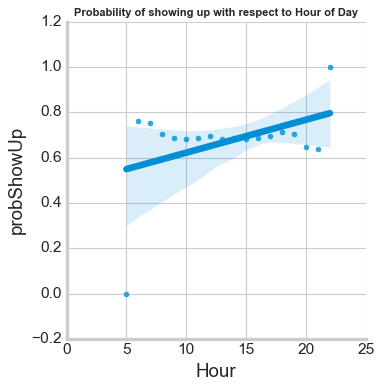

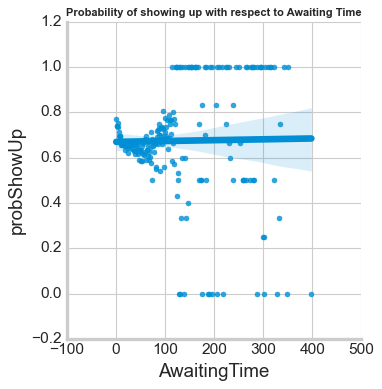

In [122]:
sns.lmplot(data = probStatus(df, 'Age'), x = 'Age', y = 'probShowUp', fit_reg = True)
plt.title('Probability of showing up with respect to Age', fontsize=10, fontweight='bold')
plt.xlim(0, 100)

sns.lmplot(data = probStatus(df, 'Hour'), x = 'Hour', y = 'probShowUp', fit_reg = True)
plt.title('Probability of showing up with respect to Hour of Day', fontsize=10, fontweight='bold')

sns.lmplot(data = probStatus(df, 'AwaitingTime'), x = 'AwaitingTime', y = 'probShowUp', fit_reg = True)
plt.title('Probability of showing up with respect to Awaiting Time', fontsize=10, fontweight='bold');

In [123]:
df['Diabetes'].unique()

array([0, 1])

### Probability of showing up by Ailments

In [125]:
df.Alcoholism.value_counts()

0    292497
1      7503
Name: Alcoholism, dtype: int64